In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation

In [2]:
import math

In [25]:
df = pd.read_csv('data/house_price_water_quality.csv').astype('float32')
df.head()

,price,Result,Polluted,Ratio,house_price_age,Alameda,Amador,Butte,Calaveras,Del Norte,...,"p,p'-DDD","p,p'-DDE","p,p'-DDT",p-Xylene,pH,"s,s,s-Tributyl Phosphorotrithioate (DEF)",sec-Butylbenzene,tert-Butylbenzene,"trans-1,2-Dichloroethene","trans-1,3-Dichloropropene"
0,226149.0,120.0,1.0,12.0,32.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,226149.0,0.0,0.0,0.0,32.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,226149.0,360.0,1.0,36.0,32.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,226149.0,25.0,1.0,5.0,32.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,226149.0,849.0,1.0,849.0,32.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

In [27]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

In [28]:
scaled_df

array([[1.1670400e-01, 2.4199995e-05, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1670400e-01, 1.9999996e-07, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1670400e-01, 7.2199990e-05, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.3061822e-01, 8.3799987e-06, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3061822e-01, 1.3799997e-05, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.3061822e-01, 1.7099997e-06, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [30]:
y = scaled_df[:,0]
X = scaled_df[:,1:]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [32]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [33]:
regressor = Sequential()
num_units = 100
drop_value = 0.2
regressor.add(LSTM(num_units, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(drop_value))
regressor.add(Dense(units = 1))

In [34]:
optimizer = keras.optimizers.Adam(clipvalue=0.5)
regressor.compile(optimizer=optimizer, loss='mean_squared_error')

In [35]:
history = regressor.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, 
    batch_size=64, 
    verbose=1, 
    shuffle=True)

Epoch 1/20
7195/7195 [==============================] - 30s 4ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 2/20
7195/7195 [==============================] - 25s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/20
7195/7195 [==============================] - 28s 4ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/20
7195/7195 [==============================] - 27s 4ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/20
7195/7195 [==============================] - 26s 4ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/20
7195/7195 [==============================] - 27s 4ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/20
7195/7195 [==============================] - 24s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/20
7195/7195 [==============================] - 28s 4ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/20
7195/7195 [==============================] - 33s 5ms/step - loss: 0.0011 - val_loss: 9.2110e-04
Epoch 10/20
7195/7195 [==============================] - 25s 3ms/step

In [49]:
np.arange(20000, 200000, 1000)

array([ 20000,  21000,  22000,  23000,  24000,  25000,  26000,  27000,
        28000,  29000,  30000,  31000,  32000,  33000,  34000,  35000,
        36000,  37000,  38000,  39000,  40000,  41000,  42000,  43000,
        44000,  45000,  46000,  47000,  48000,  49000,  50000,  51000,
        52000,  53000,  54000,  55000,  56000,  57000,  58000,  59000,
        60000,  61000,  62000,  63000,  64000,  65000,  66000,  67000,
        68000,  69000,  70000,  71000,  72000,  73000,  74000,  75000,
        76000,  77000,  78000,  79000,  80000,  81000,  82000,  83000,
        84000,  85000,  86000,  87000,  88000,  89000,  90000,  91000,
        92000,  93000,  94000,  95000,  96000,  97000,  98000,  99000,
       100000, 101000, 102000, 103000, 104000, 105000, 106000, 107000,
       108000, 109000, 110000, 111000, 112000, 113000, 114000, 115000,
       116000, 117000, 118000, 119000, 120000, 121000, 122000, 123000,
       124000, 125000, 126000, 127000, 128000, 129000, 130000, 131000,
      

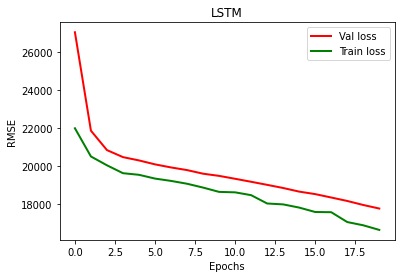

In [55]:
plt.plot([550000 * math.sqrt(loss) for loss in history.history['loss']],'r',linewidth=2, label='Val loss')
plt.plot([550000 * math.sqrt(loss) for loss in history.history['val_loss']], 'g',linewidth=2, label='Train loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [37]:
preds = regressor.predict(X_test).squeeze()

In [38]:
explained_variance_score(preds, y_test)

0.9577658176422119

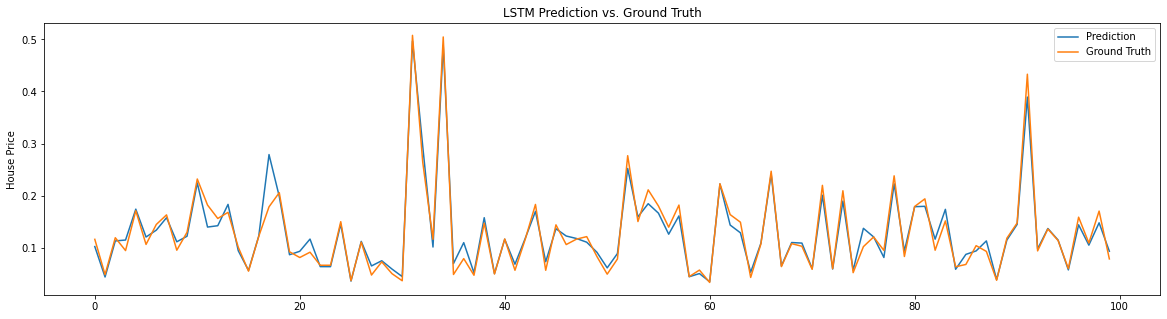

In [35]:
x_axis = range(0, 100)

fig, ax = pyplot.subplots(figsize=(20,5))
ax.plot(x_axis, preds[:100], label='Prediction')
ax.plot(x_axis, y_test[:100], label='Ground Truth')
ax.legend()

pyplot.ylabel('House Price')
pyplot.title('LSTM Prediction vs. Ground Truth')
pyplot.show()

In [3]:
df = pd.read_csv('data/house_price_air_quality.csv').astype('float32')
df.drop(['Year'], axis=1, inplace=True)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
y = scaled_df[:,0]
X = scaled_df[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [4]:
regressor = Sequential()
num_units = 100
drop_value = 0.2
regressor.add(LSTM(num_units, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(drop_value))
regressor.add(Dense(units = 1))
optimizer = keras.optimizers.Adam(clipvalue=0.5)
regressor.compile(optimizer=optimizer, loss='mean_squared_error')
history = regressor.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, 
    batch_size=64, 
    verbose=1, 
    shuffle=True)

2022-04-21 21:34:42.012464: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-21 21:34:42.543806: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
3632/3632 [==============================] - 12s 3ms/step - loss: 0.0023 - val_loss: 0.0016
Epoch 2/20
3632/3632 [==============================] - 10s 3ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 3/20
3632/3632 [==============================] - 10s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/20
3632/3632 [==============================] - 10s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/20
3632/3632 [==============================] - 10s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/20
3632/3632 [==============================] - 10s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/20
3632/3632 [==============================] - 10s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/20
3632/3632 [==============================] - 10s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/20
3632/3632 [==============================] - 10s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/20
3632/3632 [==============================] - 10s 3ms/step - l

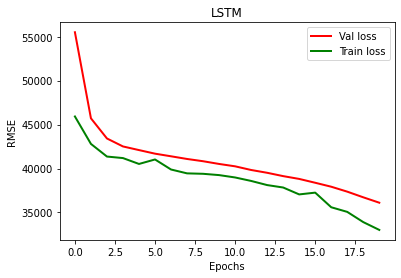

In [5]:
plt.plot([1150000 * math.sqrt(loss) for loss in history.history['loss']],'r',linewidth=2, label='Val loss')
plt.plot([1150000 * math.sqrt(loss) for loss in history.history['val_loss']] , 'g',linewidth=2, label='Train loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [63]:
preds = regressor.predict(X_test).squeeze()
explained_variance_score(preds, y_test)

0.9298391938209534

In [64]:
df = pd.read_csv('data/house_price_oil_wells.csv').astype('float32')
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
y = scaled_df[:,0]
X = scaled_df[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [65]:
regressor = Sequential()
num_units = 100
drop_value = 0.2
regressor.add(LSTM(num_units, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(drop_value))
regressor.add(Dense(units = 1))
optimizer = keras.optimizers.Adam(clipvalue=0.5)
regressor.compile(optimizer=optimizer, loss='mean_squared_error')
history = regressor.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=20, 
    batch_size=64, 
    verbose=1, 
    shuffle=True)

Epoch 1/20
151/151 [==============================] - 2s 5ms/step - loss: 0.0082 - val_loss: 0.0034
Epoch 2/20
151/151 [==============================] - 0s 3ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 3/20
151/151 [==============================] - 1s 4ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 4/20
151/151 [==============================] - 1s 6ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 5/20
151/151 [==============================] - 1s 4ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 6/20
151/151 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/20
151/151 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 8/20
151/151 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 9/20
151/151 [==============================] - 1s 3ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/20
151/151 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 0.0018

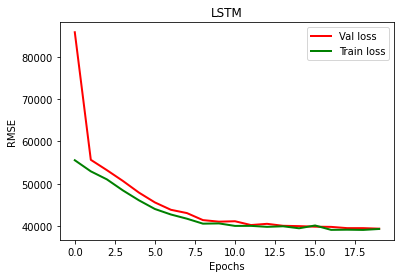

In [68]:
plt.plot([950000 * math.sqrt(loss) for loss in history.history['loss']],'r',linewidth=2, label='Val loss')
plt.plot([950000 * math.sqrt(loss) for loss in history.history['val_loss']] , 'g',linewidth=2, label='Train loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [45]:
preds = regressor.predict(X_test).squeeze()
explained_variance_score(preds, y_test)

0.8297487497329712